# 01 支持向量机

SVM: Support Vector Machine

<img src="./picture/SVM.png" weidth=878 height=614 >

尝试寻找一个最优的决策边界，距离两个类别最近的样本最远，最优边界到最近样本的最远距离作为margin=2d

SVM目的为最大化margin

线性可分问题，Hard Margin SVM

线性不可分问题，Soft Margin SVM

# 02 Hard Margin SVM

点到直线的距离

二维平面点$(x,y)$到直线 $Ax + By + C = 0$的距离为:
$$\frac{|Ax+By+C|}{\sqrt{A^2 + B^2}}$$

拓展到n维空间 $$\theta^{T} x_{b} = 0 \rightarrow w^{T}x+b=0$$

距离的计算公式：$$\frac{w^{T}x+b}{||w||}，其中||w||=\sqrt{w_{1}^{2}+w_{2}^{2}+…+w_{n}^{2}}$$

对于二维平面内的点
$$
\begin{cases}
\frac{w^{T}x^{(i)}+b}{||w||} \geq d  \quad &\forall y^{(i)}=1\\
\frac{w^{T}x^{(i)}+b}{||w||} \leq -d  \quad &\forall y^{(i)}=-1
\end{cases}
$$
计算得到：
$$
\begin{cases}
\frac{w^{T}x^{(i)}+b}{||w||d} \geq 1  \quad &\forall y^{(i)}=1\\
\frac{w^{T}x^{(i)}+b}{||w||d} \leq -1  \quad &\forall y^{(i)}=-1
\end{cases}
$$
分数上下同除分母，并简化得到
$$
\begin{cases}
w^{T}x^{(i)}+b \geq 1  \quad &\forall y^{(i)}=1\\
w^{T}x^{(i)}+b \leq -1  \quad &\forall y^{(i)}=-1
\end{cases}
$$
$合并y^{(i)}的不同情况$
$$
y^{(i)}{(w^{T}x^{(i)}+b)} \geq 1
$$

由支持向量机的目的需求，最大化d的取值：
$$
\max\{d\}=\max\{\frac{|w^{T}x^{(i)}+b|}{||w||}\}=\max\{\frac{1}{||w||}\}=\min\{||w||\}\rightarrow\min\{\frac{1}{2}||w||^2\}
$$

即，
$$
\min\{\frac{1}{2}||w||^2\} \quad \\ s.t. \quad y^{(i)}{(w^{T}x^{(i)}+b)} \geq 1
$$

# 03 Soft Margin SVM 和 SVM的正则化

放宽一定的条件，允许错误并修正目标函数，又可以称为在Soft Margin SVM **加入L1正则**，期望其对极端数据不那么敏感，繁华能力得到提升
$$
\min\{\frac{1}{2}||w||^2\}+C\sum_{i=1}^{m}{\zeta_{i}}\\ s.t. \begin{cases} y^{(i)}{(w^{T}x^{(i)}+b)} \geq 1- \zeta_{i}  \\ \zeta \geq 0 \\C为平衡两者比例的超参数\end{cases}
$$

**加入L2正则**如下：
$$
\min\{\frac{1}{2}||w||^2\}+C\sum_{i=1}^{m}{\zeta_{i}^{2}}\\ s.t. \begin{cases} y^{(i)}{(w^{T}x^{(i)}+b)} \geq 1- \zeta_{i} \\ \zeta \geq 0 \\C为平衡两者比例的超参数\end{cases}
$$

# 04 scikit-learn中的SVM

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets
iris = datasets.load_iris()

X = iris.data
y = iris.target

X = X[y<2,:2]
y = y[y<2]

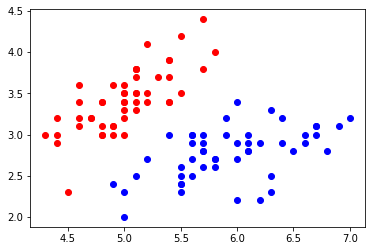

In [3]:
plt.scatter(X[y==0,0],X[y==0,1],color='red')
plt.scatter(X[y==1,0],X[y==1,1],color='blue')
plt.show()

In [4]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
standardScaler.fit(X)
X_standard = standardScaler.transform(X)

In [5]:
from sklearn.svm import LinearSVC

svc = LinearSVC(C=1e9)
svc.fit(X_standard,y)

LinearSVC(C=1000000000.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [6]:
def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1,1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1,1),
    )
    
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

ipykernel_launcher:15: UserWarning: The following kwargs were not used by contour: 'linewidth'


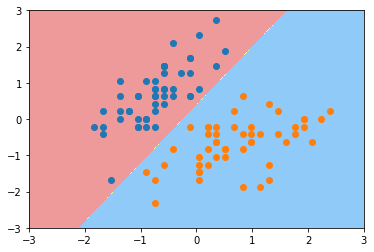

In [7]:
plot_decision_boundary(svc,axis=[-3, 3, -3, 3])
plt.scatter(X_standard[y==0,0], X_standard[y==0,1])
plt.scatter(X_standard[y==1,0], X_standard[y==1,1])
plt.show()

In [8]:
svc2 = LinearSVC(C=0.01)
svc2.fit(X_standard,y)

LinearSVC(C=0.01, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

ipykernel_launcher:15: UserWarning: The following kwargs were not used by contour: 'linewidth'


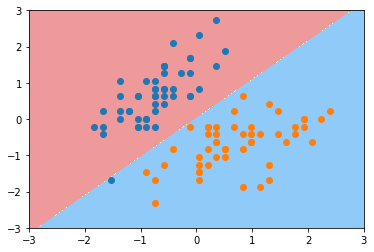

In [9]:
plot_decision_boundary(svc2,axis=[-3, 3, -3, 3])
plt.scatter(X_standard[y==0,0], X_standard[y==0,1])
plt.scatter(X_standard[y==1,0], X_standard[y==1,1])
plt.show()

In [10]:
svc.coef_

array([[ 4.03241004, -2.50698811]])

In [11]:
svc.intercept_

array([0.92732265])

In [12]:
def plot_svc_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1,1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1,1),
    )
    
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

    w = model.coef_[0]
    b = model.intercept_[0]

    # w0 * x0 + w1 * x1 + b = 0
    # => x1 = -w0/w1 *x0 - b/w1
    plot_x = np.linspace(axis[0], axis[1], 200)
    up_y = -w[0]/w[1] * plot_x -b/w[1] + 1/w[1]
    down_y = -w[0]/w[1] * plot_x -b/w[1] - 1/w[1]

    # 过滤可能超出axis的值
    up_index = (up_y >= axis[2]) & (up_y <= axis[3])
    down_index = (down_y >= axis[2]) & (down_y <= axis[3])
    plt.plot(plot_x[up_index], up_y[up_index], color="black")
    plt.plot(plot_x[down_index], down_y[down_index], color="black")

ipykernel_launcher:15: UserWarning: The following kwargs were not used by contour: 'linewidth'


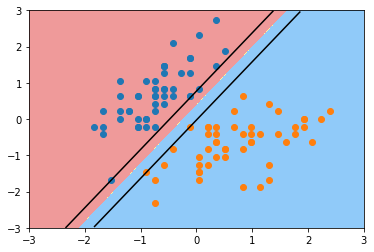

In [13]:
# svc
plot_svc_decision_boundary(svc, axis=[-3,3,-3,3])
plt.scatter(X_standard[y==0,0], X_standard[y==0,1])
plt.scatter(X_standard[y==1,0], X_standard[y==1,1])
plt.show()

ipykernel_launcher:15: UserWarning: The following kwargs were not used by contour: 'linewidth'


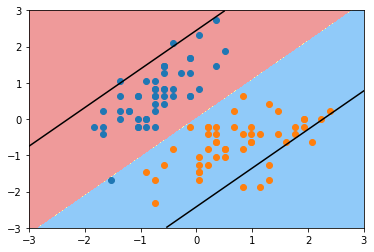

In [14]:
# svc2
plot_svc_decision_boundary(svc2, axis=[-3,3,-3,3])
plt.scatter(X_standard[y==0,0], X_standard[y==0,1])
plt.scatter(X_standard[y==1,0], X_standard[y==1,1])
plt.show()

In [22]:
svc_L1 = LinearSVC(penalty='l1',dual=False)
svc_L1.fit(X_standard,y)

LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l1', random_state=None, tol=0.0001,
          verbose=0)

ipykernel_launcher:15: UserWarning: The following kwargs were not used by contour: 'linewidth'


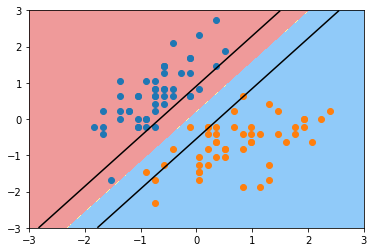

In [23]:
# svc_L1
plot_svc_decision_boundary(svc_L1, axis=[-3,3,-3,3])
plt.scatter(X_standard[y==0,0], X_standard[y==0,1])
plt.scatter(X_standard[y==1,0], X_standard[y==1,1])
plt.show()

# 05 SVM 中使用多项式特征
处理非线性问题

In [24]:
import numpy as np
import matplotlib.pyplot as plt

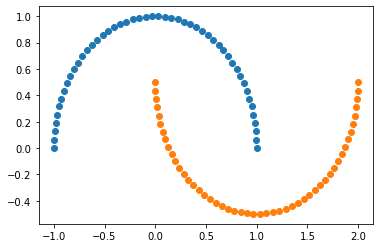

In [25]:
from sklearn import datasets

X, y =datasets.make_moons()

plt.scatter([X[y==0,0]], X[y==0,1])
plt.scatter([X[y==1,0]], X[y==1,1])
plt.show()

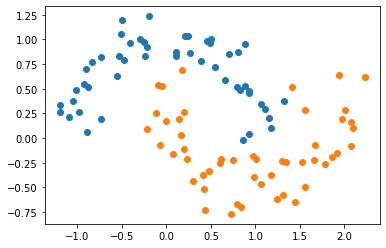

In [27]:
X, y =datasets.make_moons(noise=0.15,random_state=666)

plt.scatter([X[y==0,0]], X[y==0,1])
plt.scatter([X[y==1,0]], X[y==1,1])
plt.show()

## 使用多项式特征的SVM

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
X, y =datasets.make_moons(noise=0.15,random_state=666)


from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline # 顺序执行

def PolynomialSVC(degree,C=1.0):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("linearSVC", LinearSVC(C=C))
    ])

In [2]:
poly_svc = PolynomialSVC(degree=3)
poly_svc.fit(X, y)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linearSVC',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='squared_hinge', max_iter=1000,
                           multi_class='ovr', penalty='l2', random_state=None,
                           tol=0.0001, verbose=0))],
         verbose=False)

In [3]:
def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1,1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1,1),
    )
    
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

ipykernel_launcher:15: UserWarning: The following kwargs were not used by contour: 'linewidth'


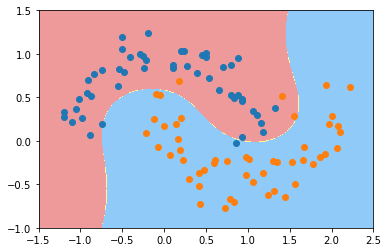

In [4]:
plot_decision_boundary(poly_svc, axis=[-1.5,2.5,-1.0,1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

## 使用多项式核函数的SVM

In [5]:
from sklearn.svm import SVC

def PolynomialKernelSVC(degree,C=1.0):
    return Pipeline([
        ("std_scaler", StandardScaler()),
        ("kernelSVC", SVC(kernel="poly",degree=degree,C=C))

    ])

In [6]:
poly_kernel_svc = PolynomialKernelSVC(degree=3)
poly_kernel_svc.fit(X, y)

Pipeline(memory=None,
         steps=[('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('kernelSVC',
                 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

ipykernel_launcher:15: UserWarning: The following kwargs were not used by contour: 'linewidth'


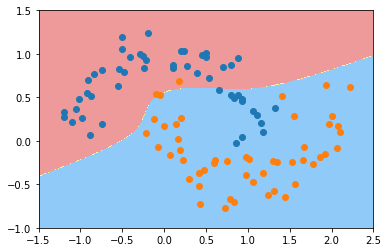

In [8]:
plot_decision_boundary(poly_kernel_svc, axis=[-1.5,2.5,-1.0,1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

## 核函数

SVM

$$
\begin{array}{c}
\min\{\frac{1}{2}||w||^2\}\\ s.t.y^{(i)}{(w^{T}x^{(i)}+b)} \geq 1- \zeta_{i}  \\ \zeta \geq 0
\end{array}

\longrightarrow 

\begin{array}{c}
\max{\sum_{i=1}^{m}\alpha_i} - \frac{1}{2}\sum_{i=1}^{m}\sum_{j=1}^{m}\alpha_{i}\alpha_{j}y_{i}y_{j}x_{i}x_{j} \\ s.t.  0 \leq \alpha_i \leq C \\  \sum_{i=1}^{m}\alpha_{i}y_{i}=0
\end{array}
$$

将$x^{'(i)} x^{'(j)}$优先计算为核函数$K(x^{(i)},x^{(j)})=x^{'(i)} x^{'(j)}$

则有，
$$
\begin{array}{c}
\max{\sum_{i=1}^{m}\alpha_i} - \frac{1}{2}\sum_{i=1}^{m}\sum_{j=1}^{m}\alpha_{i}\alpha_{j}y_{i}y_{j}K(x_i,x_j) \\ s.t.  0 \leq \alpha_i \leq C \\  \sum_{i=1}^{m}\alpha_{i}y_{i}=0
\end{array}
$$

## 多项式核函数
$$
\begin{array}{l}
K(x,y)&=(x \cdot y +1)^2 \hspace{1cm}\\
K(x,y)&=(\sum_{i=1}^{n} x_{i} y_{j} + 1)^2 \\
&=\sum_{i=1}^{n}(x_{i}^{2})(y_{i}^{2}) + \sum_{i=2}^{n} \sum_{j=1}^{i-1}(\sqrt{2}x_{i}x_{i})(\sqrt{2}y_{i}y_{i}) + \sum_{i=1}^{n}(\sqrt{2}x_i)(\sqrt{2}y_i) +1
\end{array}
$$
其中，
$$
x' = (x_n^2,…,x_1^2, \sqrt{2}x_{n}x_{n-1},…,\sqrt{2}x_{n},…,\sqrt{2}x_{1},1)\\
y'同理 = (y_n^2,…,y_1^2, \sqrt{2}y_{n}y_{n-1},…,\sqrt{2}y_{n},…,\sqrt{2}y_{1},1)
$$

得到

$$
\begin{array}{l}
\max{\sum_{i=1}^{m}\alpha_i} - \frac{1}{2}\sum_{i=1}^{m}\sum_{j=1}^{m}\alpha_{i}\alpha_{j}y_{i}y_{j}K(x_i,x_j) \\
K(x_i,x_j)=(x_i \cdot x_j + 1)^2\\
s.t.  0 \leq \alpha_i \leq C \\  \sum_{i=1}^{m}\alpha_{i}y_{i}=0
\end{array}
$$

## 核函数

$$
\begin{array}{l}

多项式核函数 \quad & K(x,y)=(x \cdot y + c)^d \\
线性核函数 \quad & K(x,y)=x \cdot y \\
高斯核函数 \quad & K(x,y)=e^{-\gamma{||x-y||}^2}
\end{array}
$$

# 07 高斯核函数

$K(x,y)$表示x和y的点乘
$$K(x,y)=e^{-\gamma{||x-y||}^2}$$
$$高斯函数\quad g(x)=\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2}$$



- PS：多项式特征
    其依靠升维使得原本线性不可分的数据线性可分 

高斯核函数也称为RBF核 Radial Basis Function Kernel

是将每一个样本点映射到一个无穷维的特征空间

高斯核对于每一个数据点都是landmark

m\*n的数据映射成了m\*m的数据

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.arange(-4, 5, 1)
x

array([-4, -3, -2, -1,  0,  1,  2,  3,  4])

In [3]:
y = np.array((x>=-2) & (x<=2), dtype='int')
y

array([0, 0, 1, 1, 1, 1, 1, 0, 0])

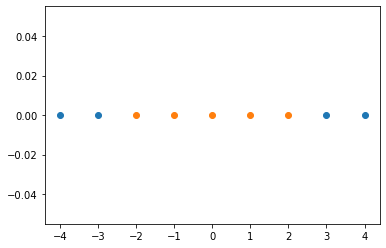

In [4]:
plt.scatter(x[y==0],[0]*len(x[y==0]))
plt.scatter(x[y==1],[0]*len(x[y==1]))
plt.show()

In [8]:
def gaussian(x, l):
    gamma = 1.0
    return np.exp(-gamma * (x-l)**2)

In [9]:
l1, l2 = -1, 1
X_new = np.empty((len(x), 2))
for i, data in enumerate(x):
    X_new[i,0] = gaussian(data, l1)
    X_new[i,1] = gaussian(data, l2)

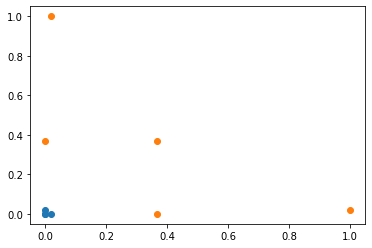

In [10]:
plt.scatter(X_new[y==0,0], X_new[y==0,1])
plt.scatter(X_new[y==1,0], X_new[y==1,1])
plt.show()

# 08 高斯核函数中的 $\gamma$

$$
K(x,y)=e^{-\gamma{||x-y||}^2}\\
高斯函数\quad g(x)=\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2}\\
\gamma越大，高斯分布越窄\\
\gamma越小，高斯分布越宽
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

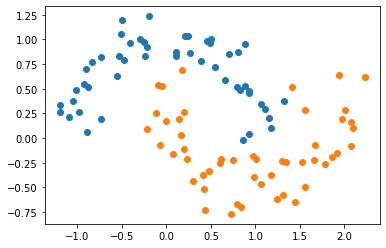

In [2]:
from sklearn import datasets

X, y = datasets.make_moons(noise=0.15, random_state=666)

plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

def RBFKernelSVC(gamma=1.0):
    return Pipeline([
        ("std_scaler", StandardScaler()),
        ("svc",SVC(kernel="rbf", gamma=gamma))
    ])

In [4]:
svc = RBFKernelSVC(gamma=1.0)
svc.fit(X,y)

Pipeline(memory=None,
         steps=[('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=1.0,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [5]:
def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1,1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1,1),
    )
    
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

ipykernel_launcher:15: UserWarning: The following kwargs were not used by contour: 'linewidth'


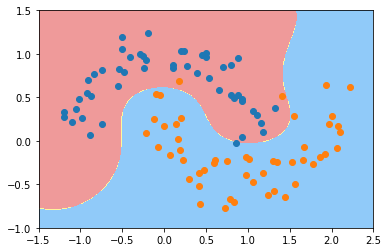

In [7]:
plot_decision_boundary(svc, axis=[-1.5,2.5,-1.0,1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

ipykernel_launcher:15: UserWarning: The following kwargs were not used by contour: 'linewidth'


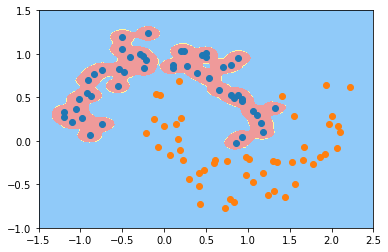

In [10]:
svc_gamma100 = RBFKernelSVC(gamma=100.0)
svc_gamma100.fit(X,y)

plot_decision_boundary(svc_gamma100, axis=[-1.5,2.5,-1.0,1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

ipykernel_launcher:15: UserWarning: The following kwargs were not used by contour: 'linewidth'


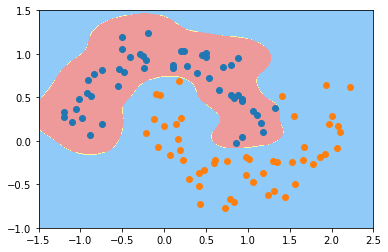

In [11]:
svc_gamma10 = RBFKernelSVC(gamma=10.0)
svc_gamma10.fit(X,y)

plot_decision_boundary(svc_gamma10, axis=[-1.5,2.5,-1.0,1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

ipykernel_launcher:15: UserWarning: The following kwargs were not used by contour: 'linewidth'


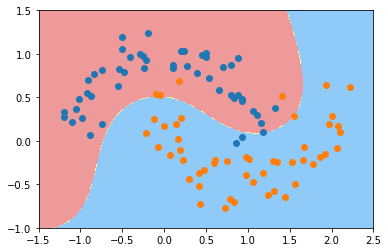

In [12]:
svc_gamma05 = RBFKernelSVC(gamma=0.5)
svc_gamma05.fit(X,y)

plot_decision_boundary(svc_gamma05, axis=[-1.5,2.5,-1.0,1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

ipykernel_launcher:15: UserWarning: The following kwargs were not used by contour: 'linewidth'


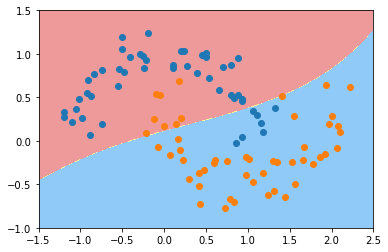

In [13]:
svc_gamma01 = RBFKernelSVC(gamma=0.1)
svc_gamma01.fit(X,y)

plot_decision_boundary(svc_gamma01, axis=[-1.5,2.5,-1.0,1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

# 09 SVM解决回归问题

In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
from sklearn import datasets

boston = datasets.load_boston()
X = boston.data
y = boston.target

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [19]:
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

def StandardLinearSVR(epsilon=0.1):
    return Pipeline([
        ("std_scaler", StandardScaler()),
        ("linaerSVR", LinearSVR(epsilon=epsilon))
    ])

In [20]:
svr = StandardLinearSVR()
svr.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linaerSVR',
                 LinearSVR(C=1.0, dual=True, epsilon=0.1, fit_intercept=True,
                           intercept_scaling=1.0, loss='epsilon_insensitive',
                           max_iter=1000, random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [21]:
svr.score(X_test,y_test)

0.6358424221312348